Hola **Aylin**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto 15: Categorización de peliculas basado en sus reseñas para Film Junky Union

# Descripción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [22]:
import math

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import uniform

import nltk
nltk.download('all')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import sklearn.metrics as metrics
import spacy
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from scipy.stats import randint


from tqdm.auto import notebook_tqdm,tqdm
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
import time



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\aylin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\aylin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\aylin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\aylin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\aylin\AppData\Roaming\nltk_data...
[

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la importación de librerías! Para futuros proyectos te recomiendo seguir una buena práctica que es darle un orden a estas importaciones siguiente el siguiente:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
</div>

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

plt.style.use('seaborn-v0_8-colorblind')

In [3]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Cargar datos

In [4]:
df_reviews = pd.read_csv('C:\\Users\\aylin\\Downloads\\imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hay que tener cuidado con cargar los datos usando rutas absolutas al archivo, no en todos los computadores se tendrá la misma ruta y es importante garantizar una correcta ejecución de los notebooks. Es mejor usar la librería `os` para construir las rutas o dejarlo en carpetas más sencillas cómo `/datasets/file.csv`
</div>

In [5]:
df_reviews.sample(10, random_state=5346)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
395,tt0120577,movie,54,54,1998,\N,93,0,"Drama,Music",5.9,31047,54 is a film about a club with that very title...,4,neg,0,train,7016
8605,tt0325214,movie,Curse of the Forty-Niner,Curse of the Forty-Niner,2002,\N,86,0,Horror,3.7,725,This was bad enough. I really hope that there ...,3,neg,0,test,5758
25399,tt0035160,movie,Ossessione,Ossessione,1943,\N,140,0,"Crime,Drama,Romance",7.6,6547,"Oh, those sneaky Italians. It's not the first ...",8,pos,1,train,11302
34880,tt0145681,movie,The Bone Collector,The Bone Collector,1999,\N,118,0,"Crime,Drama,Mystery",6.7,150028,"I wouldn't recommend this to anyone, except ci...",1,neg,0,test,9544
26761,tt0091786,movie,Power,Power,1986,\N,111,0,Drama,5.7,2625,Everyone involved (and the audience) should se...,3,neg,0,train,8690
20176,tt0019074,movie,"Laugh, Clown, Laugh","Laugh, Clown, Laugh",1928,\N,73,0,Drama,7.6,1672,"""Laugh, Clown Laugh"" released in 1928, stars t...",4,neg,0,train,5658
16433,tt0095305,movie,High Tide,High Tide,1987,\N,101,0,Drama,7.0,773,Judy Davis shows us here why she is one of Aus...,8,pos,1,train,2952
17862,tt0373024,movie,Imaginary Heroes,Imaginary Heroes,2004,\N,111,0,"Comedy,Drama",7.2,9339,Some may think Imaginary Heroes is a movie exa...,10,pos,1,test,5396
14065,tt0080771,movie,Galaxina,Galaxina,1980,\N,95,0,"Comedy,Sci-Fi",3.7,2562,I have yet to watch STARCRASH (1979) - that no...,2,neg,0,test,10246
41468,tt0485601,movie,The Secret of Kells,The Secret of Kells,2009,\N,71,0,"Adventure,Animation,Family",7.6,30156,"The Secret of Kells is one of the most unique,...",9,pos,1,train,11662


In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

<span style='color:green'> Podemos observar que tenemos varias columnas que no nos van a servir para analizar en nuestros modelos, por el momento se ocupan todas para EDA. También, está presenta la columna objetivo 'POS', '0' para negativo y '1' para positivo, y 2 columnas tienen datos nulos pero por la cantidad que son 2, decido que se pueden quedar así. Para finalizar tenemos 'ds_part' que contiene 'entrenamiento'/'prueba' para la parte de entrenamiento/prueba del conjunto de datos que se ocupará más adelante. También, las columnas 'runtime_minutes' y 'end_year' tienen un tipo de datos incorrecto y se va a corregir.
 </span>

In [7]:
df_reviews

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47326,tt0068398,tvEpisode,Étude in Black,Étude in Black,1972,\N,97,0,"Crime,Drama,Mystery",7.7,2254,This is another of my favorite Columbos. It sp...,10,pos,1,test,6038
47327,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Talk about being boring! I got this expecting ...,4,neg,0,test,989
47328,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,"I never thought I'd say this about a biopic, b...",8,pos,1,test,4163
47329,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Spirit and Chaos is an artistic biopic of Miya...,9,pos,1,test,4164


In [8]:
df_reviews['end_year'] = df_reviews['end_year'].replace("\\N", np.nan).astype('float')
df_reviews['runtime_minutes'] = df_reviews['runtime_minutes'].replace("\\N", np.nan).astype('float')
df_reviews.describe()

,start_year,end_year,runtime_minutes,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,2279.000000,46843.000000,47331.000000,47329.000000,47329.0,47331.000000,47331.000000,47331.000000
mean,1989.631235,1999.539710,98.759729,0.001732,5.998278,25562.917323,5.484608,0.498954,6279.697999
std,19.600364,11.846141,38.322569,0.041587,1.494289,83670.039163,3.473109,0.500004,3605.702545
min,1894.000000,1953.000000,1.000000,0.000000,1.400000,9.0,1.000000,0.000000,0.000000
25%,1982.000000,1995.000000,87.000000,0.000000,5.100000,827.0,2.000000,0.000000,3162.000000
50%,1998.000000,2004.000000,95.000000,0.000000,6.300000,3197.0,4.000000,0.000000,6299.000000
75%,2004.000000,2008.000000,109.000000,0.000000,7.100000,13974.0,9.000000,1.000000,9412.000000
max,2010.000000,2020.000000,1140.000000,1.000000,9.700000,1739448.0,10.000000,1.000000,12499.000000


### Revisión de balance de clases.

<Axes: xlabel='pos'>

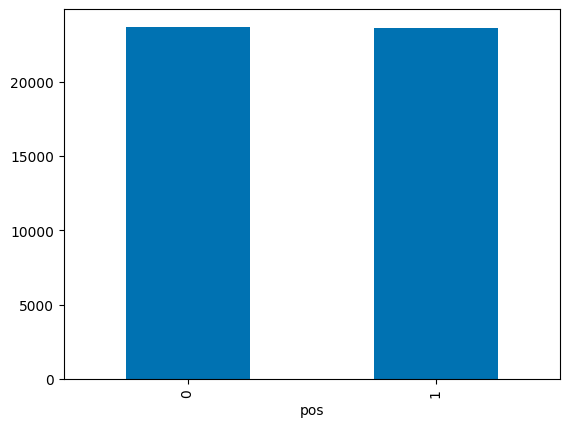

In [9]:
df_reviews['pos'].value_counts().plot(kind='bar')

In [10]:
df_reviews['pos'].value_counts()

pos
0    23715
1    23616
Name: count, dtype: int64

<span style='color:green'> Se va analizar en EDA pero con ese gráfico al parecer sí están balanceadas 
 </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto, siempre en problemas de clasificación hay que revisar el balance de las clases antes de pasar al modelado
</div>

## EDA

Veamos el número de películas y reseñas a lo largo de los años.

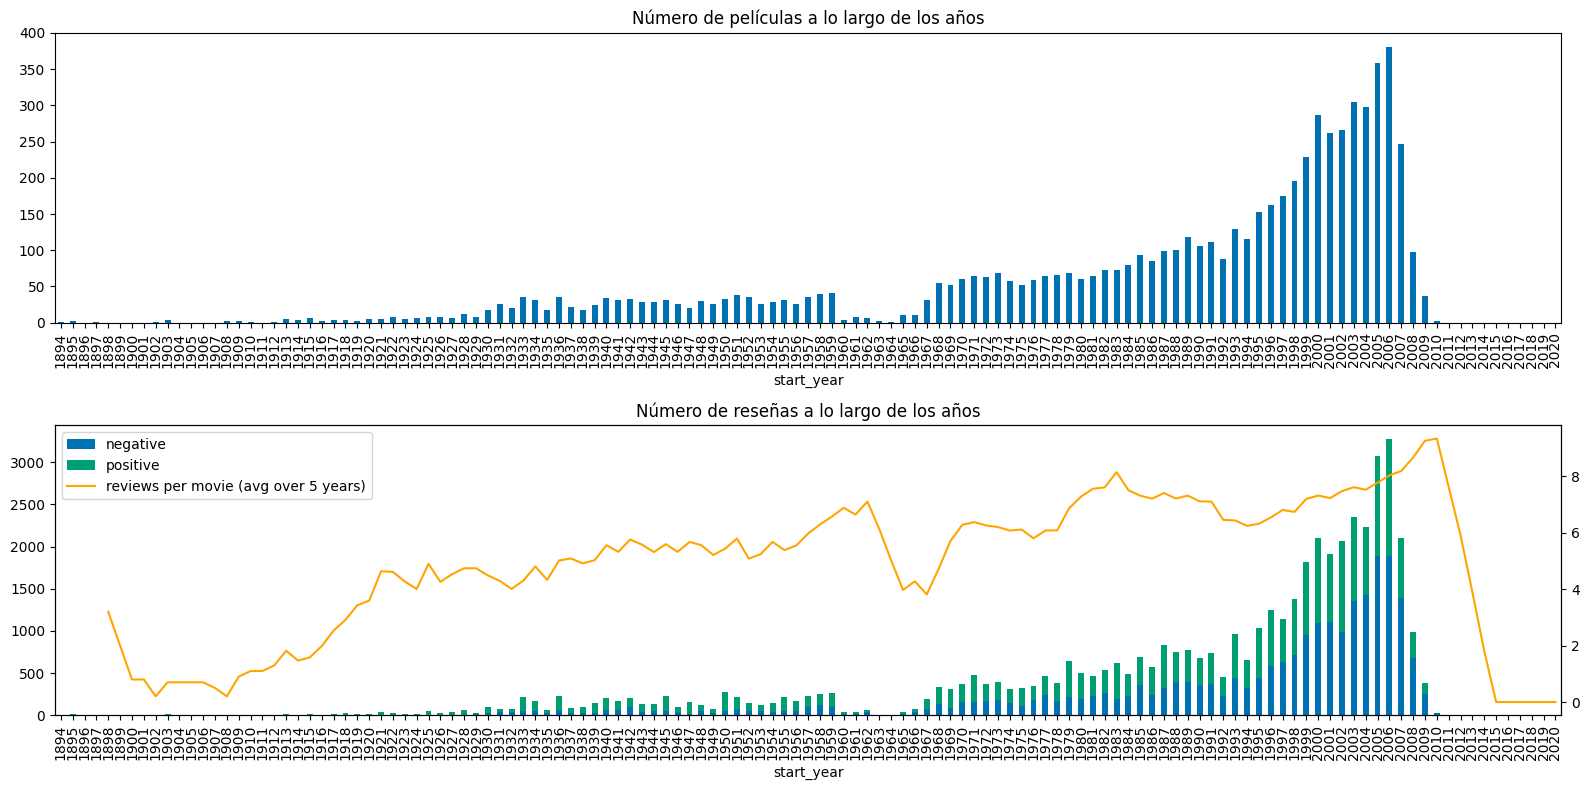

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2 = dft2.rename(columns={0: 'negative', 1: 'positive'})
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft_ratio =  dft2['positive']/(dft2['positive'] +dft2['negative'])*100 

dft2.plot(kind='bar', stacked=True, label='# reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)


lines_ax, labels_ax = ax.get_legend_handles_labels()
lines_axt, labels_axt = axt.get_legend_handles_labels()

ax.legend(lines_ax + lines_axt, labels_ax + labels_axt, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

<span style='color:green'> Podemos observar que el aumentó más marcado es con la entrada del internet y el acceso de las personas a él ya que con eso se abrió una brecha para dar una reseña o ver una película pero al mismo tiempo ésta a disminuído desde el 2007 
 </span>

### Reseñas por pelicula

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

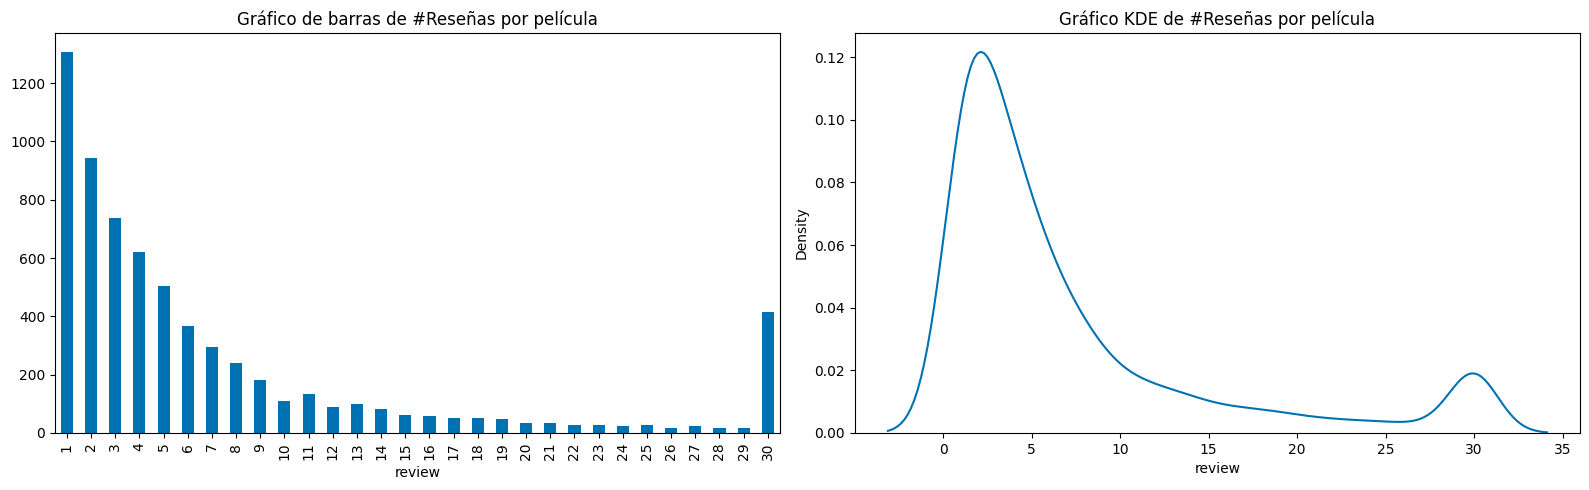

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

<span style='color:green'> Podemos observar que en la mayoría de peliculas solo hay 1-2 reseñas mientras que en las demás es más raro pero sí puede haber hasta 30 y probablemente algún límite hasta este numero y por eso sí hay más de 30 reseñas se almacena en este límite y eso explicaría el pico. 
 </span>

### Distribución de clases

C:\Users\aylin\AppData\Local\Temp\ipykernel_18992\2026102841.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


ds_part  pos
test     0      0.501508
         1      0.498492
train    0      0.500588
         1      0.499412
Name: proportion, dtype: float64


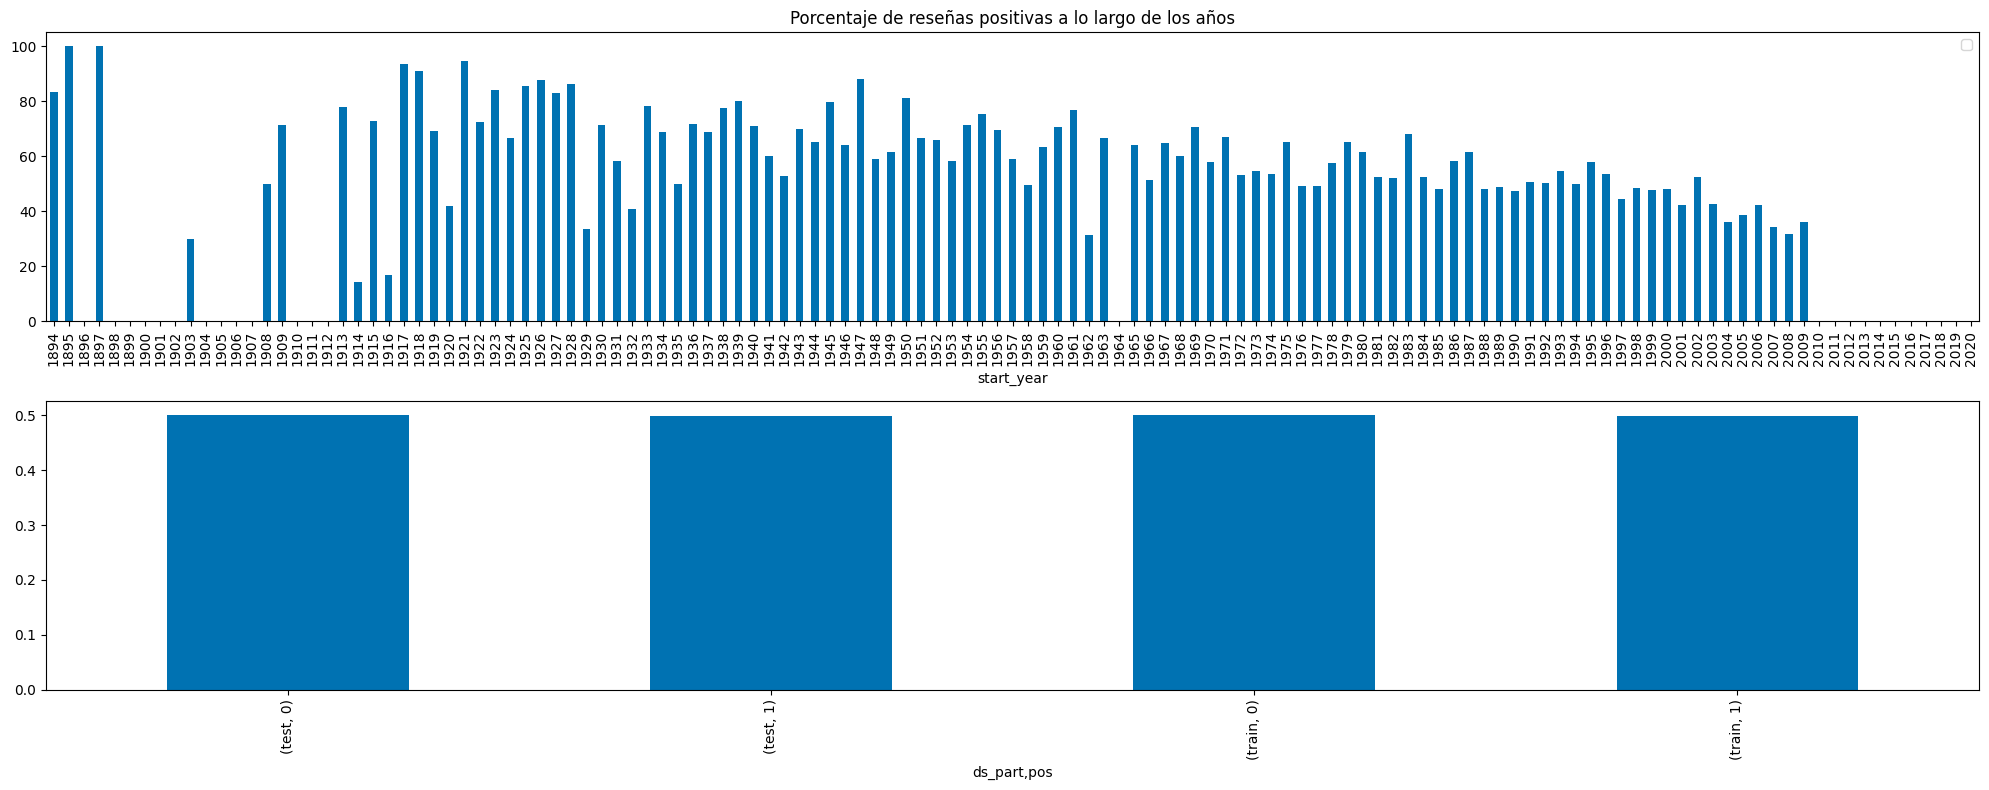

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(20, 8))

ax = axs[0]
dft_ratio = dft_ratio.replace([np.inf, -np.inf], np.nan).fillna(0)  # Manejar división por cero

dft_ratio.plot(kind='bar',  ax=ax)

ax.set_title('Porcentaje de reseñas positivas a lo largo de los años')
ax.legend()
ax = axs[1]

df_reviews.groupby(["ds_part"])["pos"].value_counts(normalize=True).plot(kind='bar')
print(df_reviews.groupby(["ds_part"])["pos"].value_counts(normalize=True))
fig.tight_layout()

<span style='color:green'> En este caso se está viendo un panorama general de la info de las reseñas positivas y podemos observar que antes de los 2000 había más reseñas y ha ido disminuyendo conforme los años, por otro lado obervamos que los datos con los que contamos están balanceados y podemos trabajar con ellos. 
 </span>

### Puntuaciones en los sets

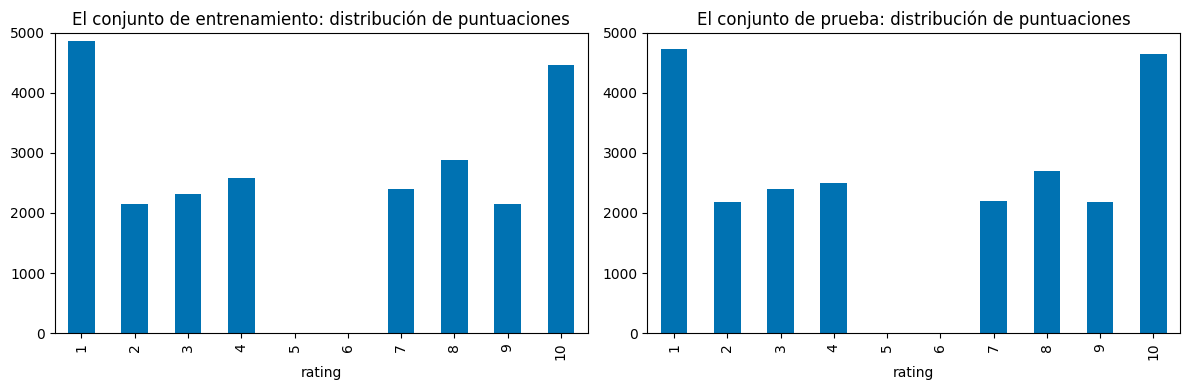

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

<span style='color:green'> Dado que las reseñas de 1 y 10 dominan la distribución, los modelos entrenados podrían favorecer predicciones en los extremos.
 </span>

### Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

C:\Users\aylin\AppData\Local\Temp\ipykernel_18992\1324160450.py:14: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
C:\Users\aylin\AppData\Local\Temp\ipykernel_18992\1324160450.py:15: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
C:\Users\aylin\AppData\Local\Temp\ipykernel_18992\1324160450.py:30: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
C:\Users\aylin\AppData\Local\Temp\ipykernel_18992\1324160450.py:31: UserWarning: 

Support for a

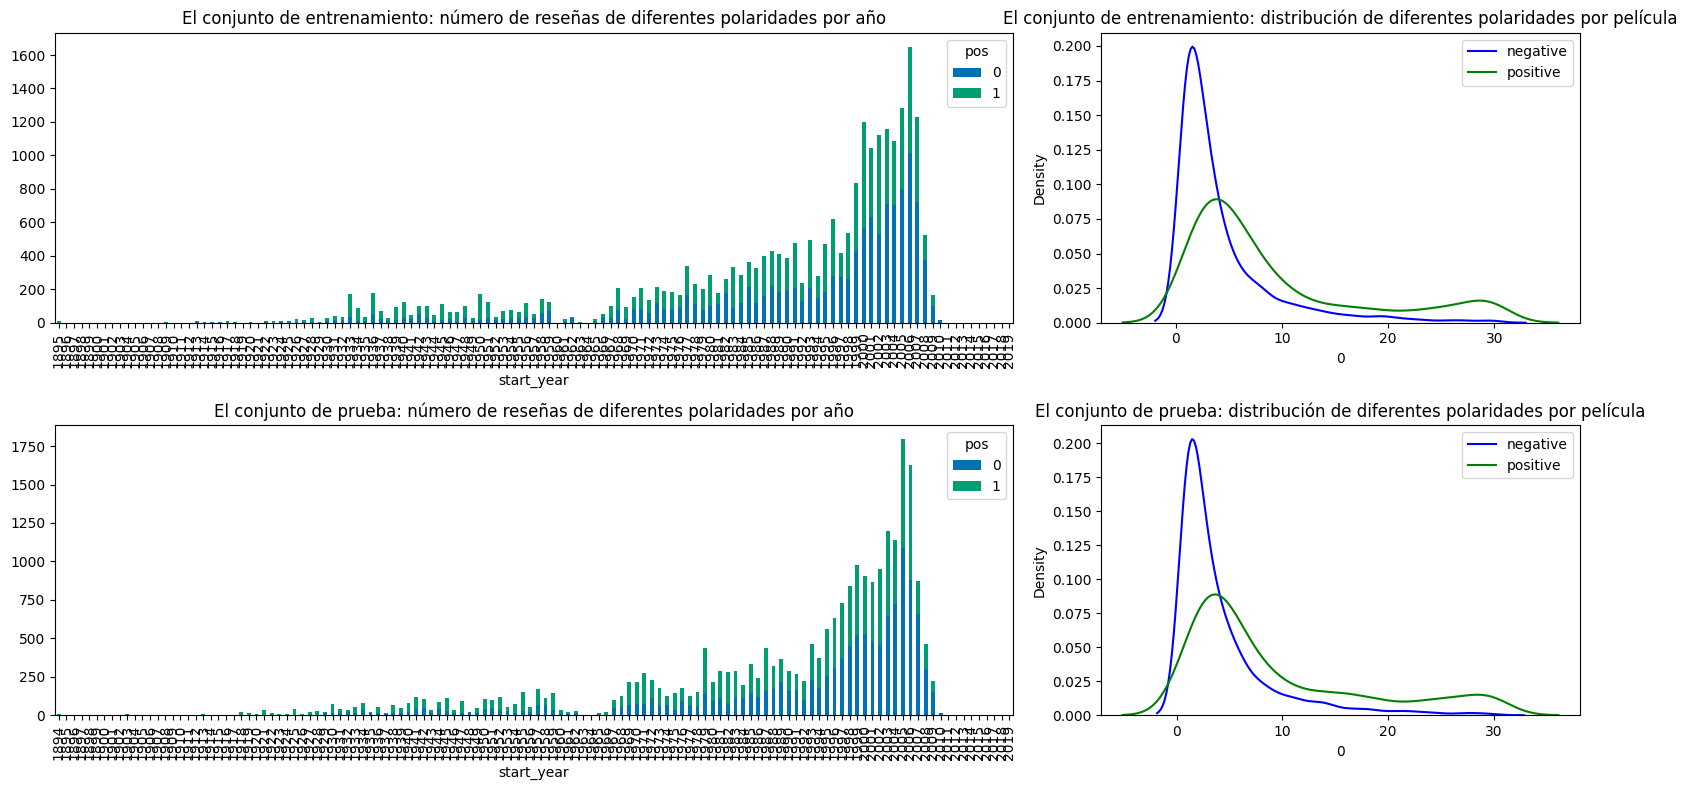

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

<span style='color:green'> La densidad y distribución de las reseñas tanto positivas como negativas que vemos en el conjunto de training y de test es muy similar
 </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, el EDA es un proceso necesario en cada proyecto para entender los datos con los que se trabajará y el redactar las interpretaciones cómo lo has hecho ayuda a este objetivo
</div>

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [16]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        #print("eval_stats_Accuaracy:",eval_stats[type]['Accuracy'])
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    #df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    display(df_eval_stats)
    
    return df_eval_stats

## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [17]:
spacy.prefer_gpu()
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner', 'textcat'])

In [18]:
def clean_text_spacy(text):
    text = re.sub(r'[^\w\s]|\d+', '', text.lower())

    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    
    return " ".join(lemmas)

In [19]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def clean_text_NLTK(text):
    text = re.sub(r'[^\w\s]|[\d+]', '', text.lower())

    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return " ".join(lemmas)

In [20]:
df_reviews['review_norm_spacy'] = df_reviews['review'].progress_apply(clean_text_spacy)

100%|██████████| 47331/47331 [15:35<00:00, 50.57it/s]


In [23]:
df_reviews['review_norm_NLTK'] = df_reviews['review'].progress_apply(clean_text_NLTK)

100%|██████████| 47331/47331 [01:09<00:00, 683.91it/s]


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Realizaste un buen trabajo con la normalización y creando la función de evaluación
</div>

## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente. Se quitan las caracteristicas que no son importantes para nuestro analisis y se trabaja con el conjunto de datos de prueba normal y los procesados con NLTK. Después hacemos lo mismo para los procesados con spacy

In [24]:
train_features = pd.DataFrame(df_reviews.query('ds_part == "train"')["review_norm_NLTK"].copy())
test_features = pd.DataFrame(df_reviews.query('ds_part == "test"')["review_norm_NLTK"].copy())

train_target = pd.DataFrame(df_reviews.query('ds_part == "train"')['pos'])
test_target = pd.DataFrame(df_reviews.query('ds_part == "test"')['pos'])
display(train_target.value_counts())
display(test_target.value_counts())

pos
0      11912
1      11884
Name: count, dtype: int64

pos
0      11803
1      11732
Name: count, dtype: int64

In [25]:
train_features =train_features.join(df_reviews.query('ds_part == "train"')["review_norm_spacy"],on=train_features.index)
test_features = test_features.join(df_reviews.query('ds_part == "test"')["review_norm_spacy"],on=test_features.index)
display(train_features.head())
display(test_features.head())

,key_0,review_norm_NLTK,review_norm_spacy
0,0,pakage implies warren beatty goldie hawn pulli...,pakage imply warren beatty goldie hawn pull hu...
1,1,hell get made presenting caper comedy misbegot...,hell present caper comedy misbegotten essent...
7,7,true story carlsons raider army training film ...,true story carlson raider army training film e...
8,8,titled balderdash little film true except name...,title balderdash little film true island fact ...
9,9,movie gung ho story carlsons makin island raid...,movie gung ho story carlson makin island raide...


,key_0,review_norm_NLTK,review_norm_spacy
2,2,real story film seems like fly wall dramadocum...,real story film like fly wall dramadocumentary...
3,3,um serious film troubled teen singapore countr...,um film troubled teen singapore country know...
4,4,im totally agree garryjohal singapore comment ...,m totally agree garryjohal singapore comment f...
5,5,first movie ive seen singapore great dont know...,movie ve see singapore great not know lot asia...
6,6,yes nonsingaporeans cant see whats big deal fi...,yes nonsingaporean not s big deal film referen...


<span style='color:green'> Los datos en general ya se procesaron para poder ocuparlos de una manera limpia y se comprobó al mismo tiempo que la distribución de los datos estuvieran balanceados para evitar que los modelos hicieran predicciones basados solo en la clase predominante así como el proceso que se le dio a los datos para trabajarlos posteriormente con los diferentes modelos 
 </span>

## Trabajar con modelos

### Modelo 0 - Constante

In [26]:

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_features["review_norm_NLTK"], train_target)

DummyClassifier(strategy='stratified')

,train,test
ROC AUC,0.5,0.5
APS,0.5,0.5
Accuracy,0.5,0.5
F1,0.5,0.5


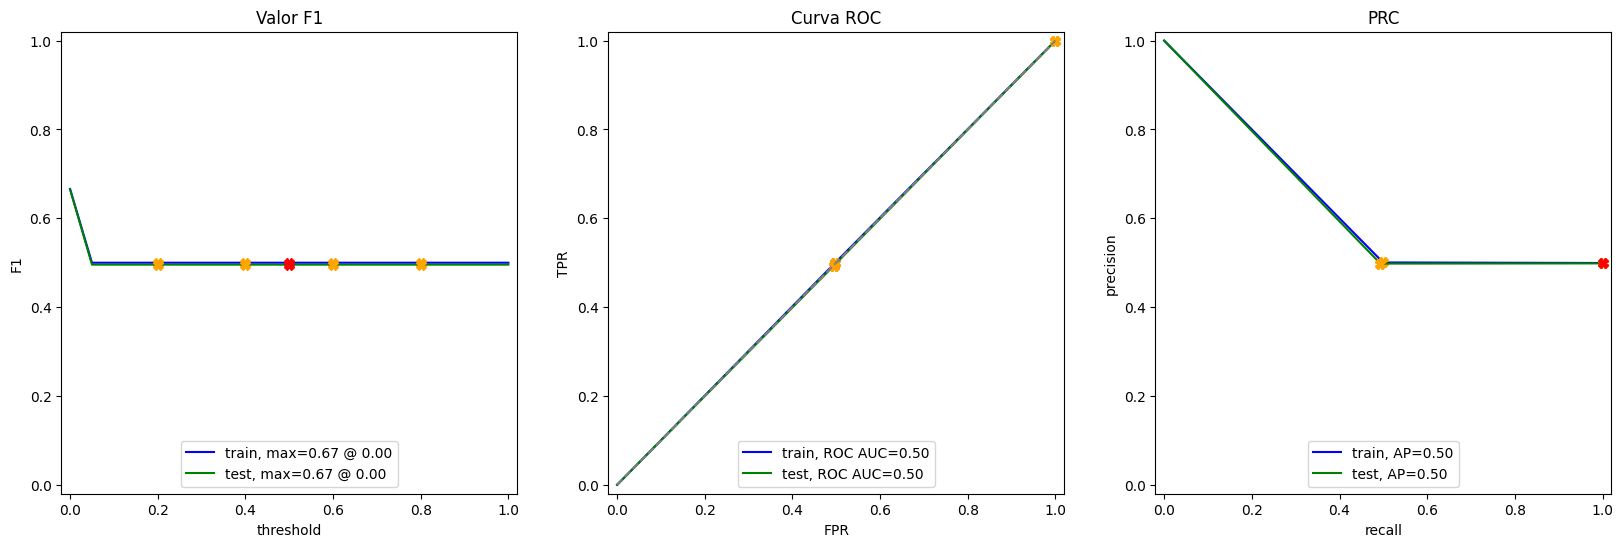

In [27]:

eval_0=evaluate_model(dummy_clf, train_features, train_target, test_features, test_target)

<span style='color:green'> Vemos un buen baseline así que los siguientes modelos deben de superar los resultados de este. Apreciamos que su rendimiento es aleatorio.
 </span>

### Modelo 1 - NLTK, TF-IDF y LR

Para el modelo se utilizará NLTK y TfidfVectorizer. Del vector TF-IDF creado se extraen las características del texto lematizado y se usarán a su vez más adelante

In [28]:
count_tf_idf_1 = TfidfVectorizer(stop_words="english")

train_features_1 = count_tf_idf_1.fit_transform(train_features["review_norm_NLTK"])
test_features_1 = count_tf_idf_1.transform(test_features["review_norm_NLTK"])

print('Tamaño de la matriz:', train_features_1.shape)

Tamaño de la matriz: (23796, 96960)


In [29]:
model_1 = LogisticRegression(solver='liblinear')
model_1.fit(train_features_1, train_target)

c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

,train,test
ROC AUC,0.98,0.95
APS,0.98,0.94
Accuracy,0.94,0.88
F1,0.94,0.88


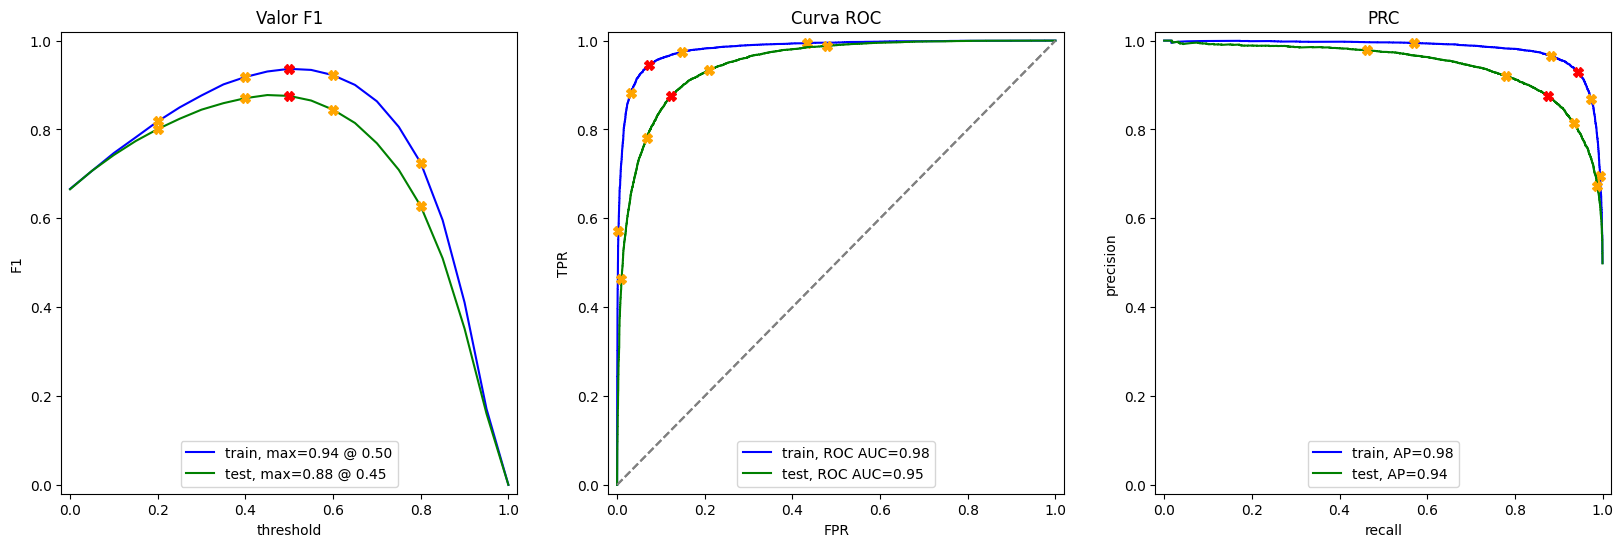

In [30]:
eval_1=evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

<span style='color:green'> Este modelo manejó bastante bien los datos de entrenamiento por lo que hay una alta precisión y F1 refiere un buen equilibrio entre la precisión y el recall. El F1 es de 0.88
 </span>

### Modelo 2 - NLTK, TF-IDF y LGBMClassifier

Los hiperparámetros se buscaron aleatoriamente 

In [31]:
param_dist  = {
    'n_estimators': randint(50, 250),
    'learning_rate': uniform(loc=0.01, scale=0.29), 
    'max_depth' : randint(2,9)}

In [32]:
model_2 = LGBMClassifier()

random_search = RandomizedSearchCV (estimator=model_2, param_distributions=param_dist, cv= 4, n_jobs=-1, scoring='f1',verbose=0)

random_search.fit(train_features_1,train_target)

c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUN

[LightGBM] [Info] Number of positive: 11884, number of negative: 11912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.659239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 452786
[LightGBM] [Info] Number of data points in the train set: 23796, number of used features: 10225
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499412 -> initscore=-0.002353
[LightGBM] [Info] Start training from score -0.002353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

RandomizedSearchCV(cv=4, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B05BA28A90>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B05BB188D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B05B54ED90>},
                   scoring='f1')

In [33]:
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("------\nBest Params", best_params)
print("Best score:", random_search.best_score_,"\n-------")
model_2_best = LGBMClassifier(**best_params)
model_2_best.fit(train_features_1,train_target)

------
Best Params {'learning_rate': 0.17633989364292466, 'max_depth': 8, 'n_estimators': 166}
Best score: 0.8480150236788757 
-------


c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 11884, number of negative: 11912
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.904121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452786
[LightGBM] [Info] Number of data points in the train set: 23796, number of used features: 10225
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499412 -> initscore=-0.002353
[LightGBM] [Info] Start training from score -0.002353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(learning_rate=0.17633989364292466, max_depth=8, n_estimators=166)

c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,train,test
ROC AUC,0.99,0.93
APS,0.99,0.93
Accuracy,0.95,0.85
F1,0.95,0.85


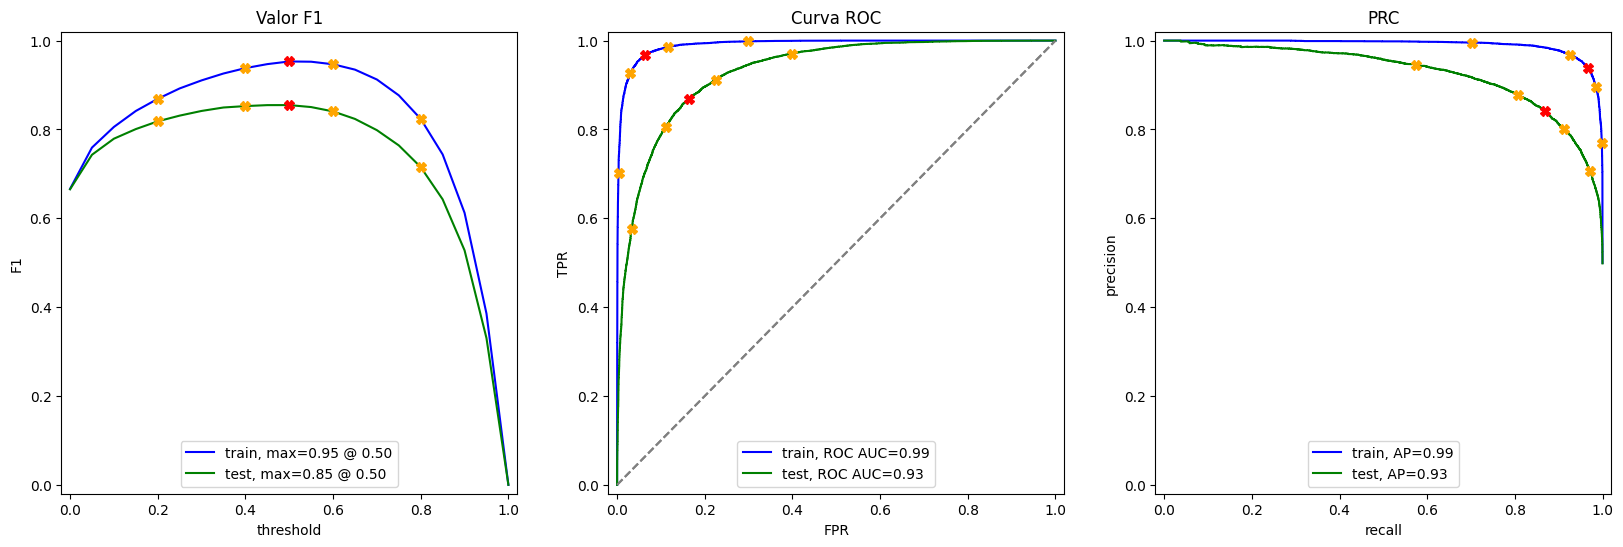

In [34]:
eval_2=evaluate_model(model_2_best, train_features_1, train_target, test_features_1, test_target)

<span style='color:green'> Este modelo tiene buen rendimiento, los gráficos muestran un poco de sobre ajuste y el ROC AUC / F1, son favorables. El modelo sí está aprendiendo patrones útiles. El F1 es 0.86
 </span>

### Modelo 3 - spaCy, TF-IDF y Logistic Regression

Vamos a vectorizar usando las reseñas lematizadas por spacy

In [35]:
count_tf_idf_3 = TfidfVectorizer(stop_words="english")

train_features_2 = count_tf_idf_3.fit_transform(train_features["review_norm_spacy"])
test_features_2 = count_tf_idf_3.transform(test_features["review_norm_spacy"])

In [36]:
print('Tamaño de la matriz:', train_features_2.shape)

Tamaño de la matriz: (23796, 91026)


In [37]:
model_3 = LogisticRegression(solver='liblinear')
model_3.fit(train_features_2, train_target)

c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

,train,test
ROC AUC,0.98,0.94
APS,0.98,0.94
Accuracy,0.93,0.88
F1,0.93,0.88


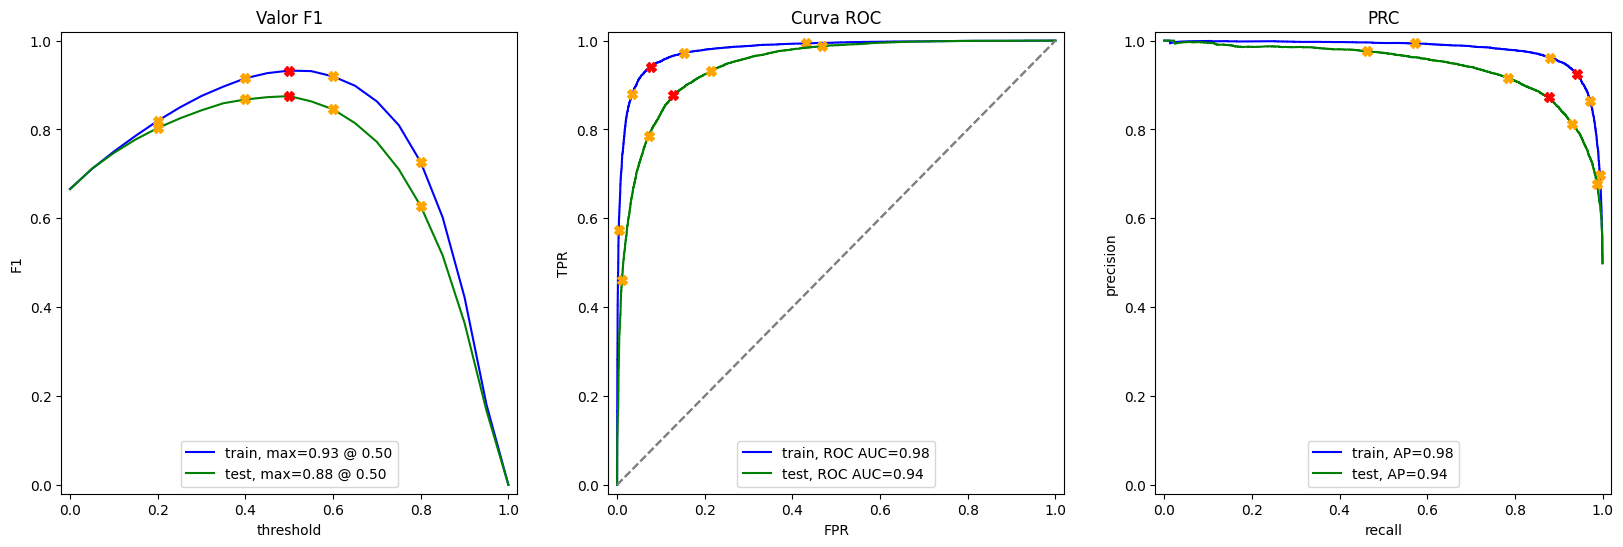

In [38]:
eval_3=evaluate_model(model_3, train_features_2, train_target, test_features_2, test_target)

<span style='color:green'> Este modelo tiene buen rendimiento, tiene la capacidad de predecir la clase positiva de manera exitosa. Con las diferencias entre los conjuntos de train y test, se ve que hay un ligero sobreajuste. El F1 es 0.88
 </span>

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

In [39]:
param_dist  = {
    'n_estimators': randint(50, 250),
    'learning_rate': uniform(loc=0.01, scale=0.29), 
    'max_depth' : randint(2,9)}

In [40]:
model_4 = LGBMClassifier()

random_search = RandomizedSearchCV (estimator=model_4, param_distributions=param_dist, cv= 4, n_jobs=-1, scoring='f1',verbose=0)

random_search.fit(train_features_2,train_target)

c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 11884, number of negative: 11912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.788385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415173
[LightGBM] [Info] Number of data points in the train set: 23796, number of used features: 9159
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499412 -> initscore=-0.002353
[LightGBM] [Info] Start training from score -0.002353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

RandomizedSearchCV(cv=4, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B05C2B9F50>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B05BB3BE10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B05BA0B990>},
                   scoring='f1')

In [41]:
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("------\nBest Params", best_params)
print("Best score:", random_search.best_score_,"\n-------")
model_4_best = LGBMClassifier(**best_params)
model_4_best.fit(train_features_2, train_target)

------
Best Params {'learning_rate': 0.28187845453322735, 'max_depth': 4, 'n_estimators': 185}
Best score: 0.8466345973266212 
-------


c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 11884, number of negative: 11912
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.759115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415173
[LightGBM] [Info] Number of data points in the train set: 23796, number of used features: 9159
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499412 -> initscore=-0.002353
[LightGBM] [Info] Start training from score -0.002353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier(learning_rate=0.28187845453322735, max_depth=4, n_estimators=185)

c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,train,test
ROC AUC,0.98,0.93
APS,0.98,0.93
Accuracy,0.92,0.85
F1,0.92,0.85


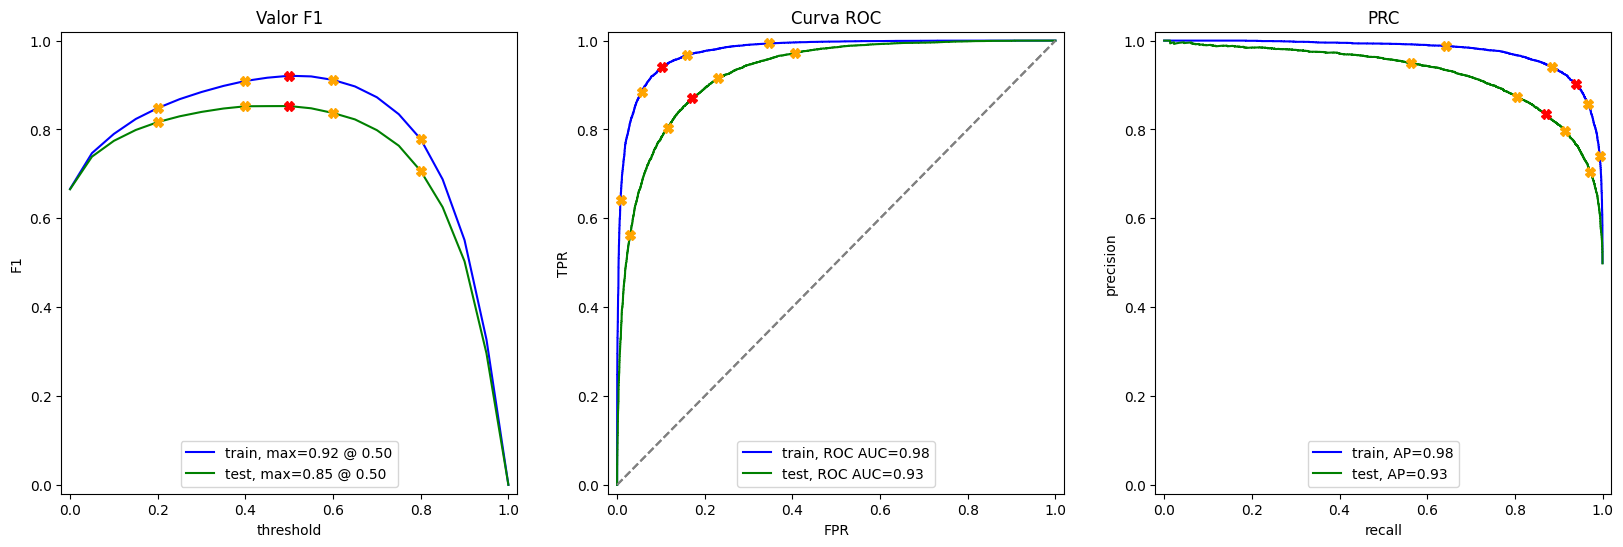

In [42]:
eval_4=evaluate_model(model_4_best, train_features_2, train_target, test_features_2, test_target)

<span style='color:green'> El modelo cuenta con un buen desempeño y sabe diferenciar las clases. El F1 logra 0.86
 </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente! Entrenaste diferentes modelos y se obtuvieron métricas bastante buenas!
</div>

## Evaluación de los modelos

In [43]:

models = [eval_0, eval_1, eval_2, eval_3, eval_4]
evaluations = pd.concat([pd.DataFrame(model).T.assign(Model=f'model_{i}') for i, model in enumerate(models)], axis=0)
evaluations.set_index(['Model'], append=True, inplace=True)
evaluations = evaluations.reorder_levels(['Model', 0])  
evaluations


ROC AUC   APS  Accuracy    F1
Model                                       
model_0 train     0.50  0.50      0.50  0.50
        test      0.50  0.50      0.50  0.50
model_1 train     0.98  0.98      0.94  0.94
        test      0.95  0.94      0.88  0.88
model_2 train     0.99  0.99      0.95  0.95
        test      0.93  0.93      0.85  0.85
model_3 train     0.98  0.98      0.93  0.93
        test      0.94  0.94      0.88  0.88
model_4 train     0.98  0.98      0.92  0.92
        test      0.93  0.93      0.85  0.85

<span style='color:green'> Los resultados de los modelos sugieren que incluso los modelos que utilizan Regresión Logística se desempeñan demasiado bien, esto también se debe a que las clases están balanceadas así que LR no le está dando prioridad a alguna de las dos clases.  
 </span>

## Mis reseñas

In [44]:

my_reviews = pd.DataFrame([
    "This movie was a rollercoaster of emotions. Loved every second of it!",
    "The acting was subpar, and the story was completely predictable. Not worth my time.",
    "A beautiful cinematographic experience. The visuals were stunning, but the pacing was a bit slow.",
    "I was on the edge of my seat the whole time! Easily one of the best thrillers I've seen.",
    "Not sure why people love this movie so much. I found it dull and uninspired.",
    "The plot was so confusing that I had to rewatch it twice. Still, great performances from the cast!",
    "A complete disaster. I can’t believe I wasted two hours of my life on this nonsense.",
    "The humor was spot on, and the dialogue felt natural. Definitely worth watching!",
    "I expected more from this director. The movie had potential but fell flat in execution.",
    "One of those movies that stay with you long after watching it. A true masterpiece!",
    "It was just okay. Not great, not terrible, just something to watch on a lazy Sunday.",
    "What a nostalgic experience! It perfectly captured the essence of the original.",
    "This is how you do an action movie! Explosions, car chases, and a solid storyline!",
    "Felt like a cash grab. No heart, no passion, just a way to make money off the franchise.",
    "The pacing was slow at first, but once it picked up, it became an unforgettable experience.",
    "i hate how much i love it"
], columns=['review'])

my_reviews['review_norm_spacy'] = my_reviews['review'].progress_apply(clean_text_spacy)
my_reviews['review_norm_NLTK'] = my_reviews['review'].progress_apply(clean_text_NLTK)

Models_predictions=pd.DataFrame(my_reviews.drop(['review_norm_spacy',"review_norm_NLTK"],axis=1).copy())

my_reviews

100%|██████████| 16/16 [00:00<00:00, 5348.60it/s]


,review,review_norm_spacy,review_norm_NLTK
0,This movie was a rollercoaster of emotions. Lo...,movie rollercoaster emotion love second,movie rollercoaster emotion loved every second
1,"The acting was subpar, and the story was compl...",acting subpar story completely predictable wor...,acting subpar story completely predictable wor...
2,A beautiful cinematographic experience. The vi...,beautiful cinematographic experience visual st...,beautiful cinematographic experience visuals s...
3,I was on the edge of my seat the whole time! E...,edge seat time easily good thriller ve see,edge seat whole time easily one best thriller ...
4,Not sure why people love this movie so much. I...,sure people love movie find dull uninspired,sure people love movie much found dull uninspired
5,The plot was so confusing that I had to rewatc...,plot confusing rewatch twice great performance...,plot confusing rewatch twice still great perfo...
6,A complete disaster. I can’t believe I wasted ...,complete disaster not believe waste hour life ...,complete disaster cant believe wasted two hour...
7,"The humor was spot on, and the dialogue felt n...",humor spot dialogue feel natural definitely wo...,humor spot dialogue felt natural definitely wo...
8,I expected more from this director. The movie ...,expect director movie potential fall flat exec...,expected director movie potential fell flat ex...
9,One of those movies that stay with you long af...,movie stay long watch true masterpiece,one movie stay long watching true masterpiece


In [45]:
def generate_predictions(n, models, preprocess_funcs, vectorizers, model_names, texts, Models_predictions):
    """
    Genera predicciones de probabilidad para múltiples modelos usando TF-IDF.

    Parameters:
    n (int): Número de modelos a usar.
    models (list): Lista de modelos ya entrenados.
    preprocess_funcs (list): Lista de funciones de preprocesamiento para los textos.
    vectorizers (list): Lista de vectorizadores TF-IDF aplicados a los textos.
    model_names (list): Nombres de cada modelo para el DataFrame resultante.
    texts (pd.Series): Textos a predecir.
    Models_predictions (pd.DataFrame): DataFrame base para almacenar las predicciones.

    Returns:
    pd.DataFrame: DataFrame con las predicciones de probabilidad de cada modelo.
    """
    
    for i in range(n):
        model_name = model_names[i]
        preprocess_func = preprocess_funcs[i]
        vectorizer = vectorizers[i]

        processed_texts = texts.apply(preprocess_func) if preprocess_func else texts
        features = vectorizer.transform(processed_texts)
        pred_prob = models[i].predict_proba(features)[:, 1]
        prob_df = pd.DataFrame({model_name: pred_prob})

        Models_predictions = Models_predictions.join(prob_df, how='left')

    return Models_predictions


In [46]:

# Lista de modelos entrenados
models = [model_1, model_2_best, model_3, model_4_best]
preprocess_funcs = [None, None, clean_text_spacy, clean_text_spacy]
vectorizers = [count_tf_idf_1, count_tf_idf_1, count_tf_idf_3, count_tf_idf_3]

model_names = ['model_1', "model_2", "model_3", "model_4"]
texts = my_reviews['review']

Models_predictions = my_reviews[['review']].copy()
Models_predictions = generate_predictions(
    n=len(models),
    models=models,
    preprocess_funcs=preprocess_funcs,
    vectorizers=vectorizers,
    model_names=model_names,
    texts=texts,
    Models_predictions=Models_predictions
)

display(Models_predictions)


c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\aylin\OneDrive\Documentos\Proyectos_T\env_comp\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,review,model_1,model_2,model_3,model_4
0,This movie was a rollercoaster of emotions. Lo...,0.869248,0.797387,0.877972,0.808502
1,"The acting was subpar, and the story was compl...",0.166099,0.565318,0.155345,0.524810
2,A beautiful cinematographic experience. The vi...,0.842131,0.833301,0.841627,0.761847
3,I was on the edge of my seat the whole time! E...,0.981412,0.931874,0.971999,0.800019
4,Not sure why people love this movie so much. I...,0.146687,0.295967,0.142814,0.408280
5,The plot was so confusing that I had to rewatc...,0.652495,0.831738,0.791485,0.857089
6,A complete disaster. I can’t believe I wasted ...,0.063230,0.308917,0.012886,0.127204
7,"The humor was spot on, and the dialogue felt n...",0.867768,0.762351,0.914665,0.728386
8,I expected more from this director. The movie ...,0.066828,0.389934,0.049817,0.395604
9,One of those movies that stay with you long af...,0.814031,0.743907,0.848296,0.731268


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! La prueba con nuevas reviews se hizo correctamente para cada uno, es importante siempre probar los modelos con data que no fue vista durante la etapa de entrenamiento para poder revisar cómo se comportarían en un entorno productivo donde le llegue datos nuevos a cada momento
</div>

## Conclusiones

Se limpiaron los datos del data set, se normmalizó el texto con Spacy y con NLTK para que los modelos pudieran utilizarlo de manera correcta. Al mismo tiempo a la hora de evaluar los modelos con reseñas y las predicciones que lograron dar como las clases están balanceadas desde el principio con un modelo que utilice la regresión logística bastaría ya que no dará importancia a una clase sobre otra erroneamente pero, eso sería hablando de una manera 'ideal' ya que muchas veces a través de los años puede haber una clase beneficiada así que se podrían ocupar modelos más robustos que fueran capaces de manejar esa diversidad. También justo en esta predicción con el conjunto de reseñas se muestra una tendencia por ejemplo con la reseña #7 que los modelos 1 y 3 (que justo son de LR) su tendencia en este caso es que la reseña es positiva pero a pesar de que los otros modelos fueron más bajos la tendencia es la misma, positiva. Y en general los modelos les es más fácil identificar las reseñas con un sentimiento claro ya sea muy positivo o muy negativo.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un excelente trabajo entrenando los diferentes modelos Aylin, obtuviste buenos scores en las métricas de evaluación con los mismos. Y se debe destacar la forma en cómo vas redactando tus interpretaciones dejando un notebook mucho más fácil de seguir y con una presentación excelente.
    
Cómo pudiste ir viendo a lo largo de este proyecto para que los modelos puedan entender nuestro lenguaje o cómo los humanos se comunican hay que primero transformar estos textos a números utilizando vectorización para poder tener una representación de estos y que los modelos puedan realizar las asociaciones necesarias y así obtener predicciones.
    
Saludos!
</div>

# Lista de comprobación

- [x]  Abriste el notebook
- [x]  Cargaste y preprocesaste los datos de texto para su vectorización
- [x]  Transformaste los datos de texto en vectores
- [x]  Entrenaste y probaste los modelos
- [x]  Se alcanzó el umbral de la métrica
- [x]  Colocaste todas las celdas de código en el orden de su ejecución
- [x]  Puedes ejecutar sin errores todas las celdas de código 
- [x]  Hay conclusiones 